In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('loan-train.csv')
df_test = pd.read_csv('loan-test.csv')

In [3]:
df_train.drop(columns='Loan_ID', inplace = True)
df_test.drop(columns='Loan_ID', inplace = True)

In [4]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


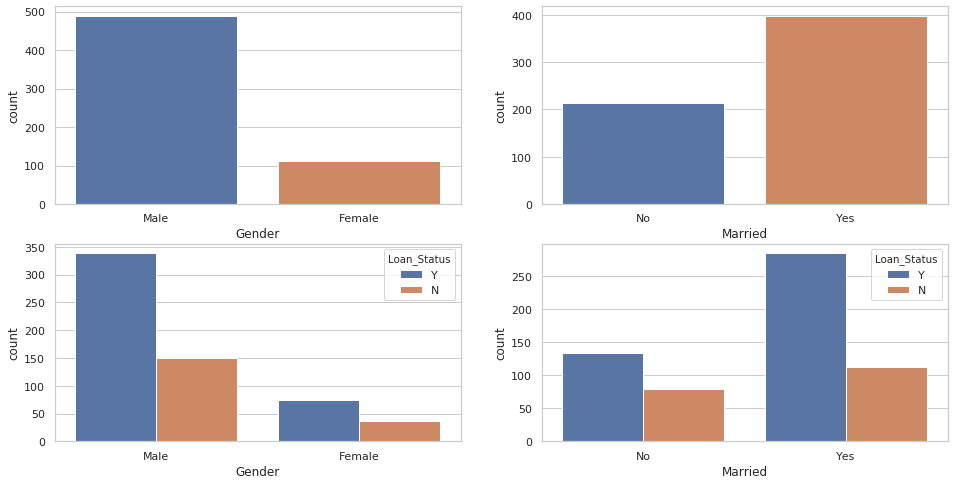

In [5]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'Gender' , data = df_train)
plt.subplot(2,2,2)
sns.countplot(x = 'Married', data= df_train)
plt.subplot(2,2,3)
sns.countplot(x = 'Gender', hue= 'Loan_Status', data = df_train)
plt.subplot(2,2,4)
sns.countplot(x = 'Married',hue = 'Loan_Status' , data= df_train)
plt.show()

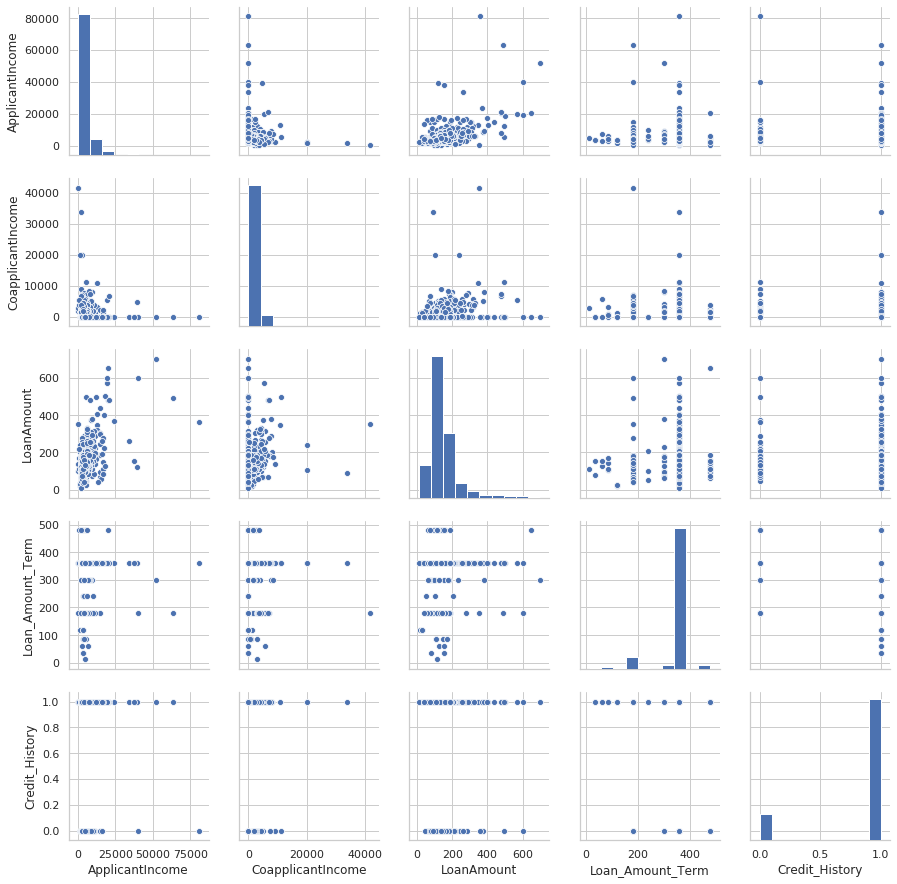

In [6]:
sns.pairplot(df_train)
plt.show()

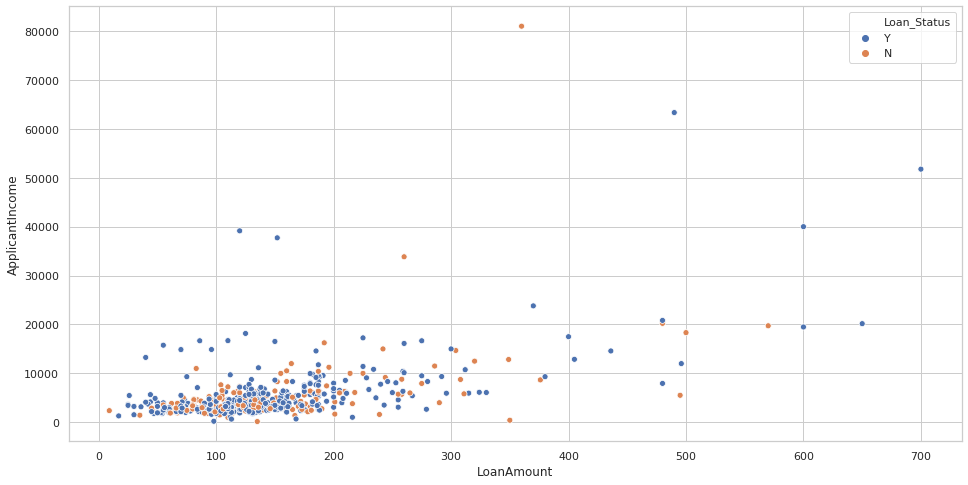

In [7]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'LoanAmount' , y = 'ApplicantIncome' , hue = 'Loan_Status', data = df_train)
plt.show()

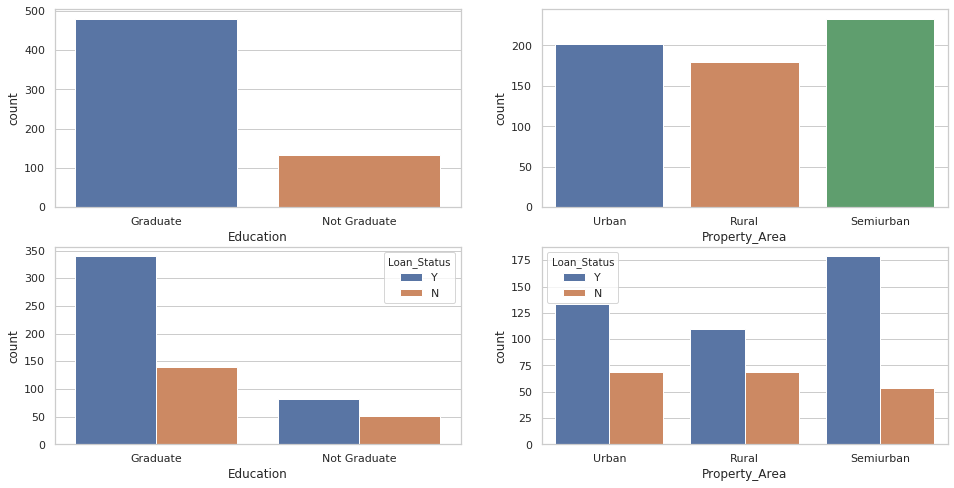

In [8]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'Education' , data = df_train)
plt.subplot(2,2,2)
sns.countplot(x = 'Property_Area', data= df_train)
plt.subplot(2,2,3)
sns.countplot(x = 'Education', hue= 'Loan_Status', data = df_train)
plt.subplot(2,2,4)
sns.countplot(x = 'Property_Area',hue = 'Loan_Status' , data= df_train)
plt.show()

In [9]:
graduate = df_train['Education'].value_counts()['Graduate']
not_graduate = df_train['Education'].value_counts()['Not Graduate']
graduate_yes = df_train[df_train['Loan_Status'] == 'Y']['Education'].value_counts()['Graduate']
not_graduate_yes = df_train[df_train['Loan_Status'] == 'Y']['Education'].value_counts()['Not Graduate']

In [10]:
print(graduate_yes / graduate)
print(not_graduate_yes / not_graduate)

0.7083333333333334
0.6119402985074627


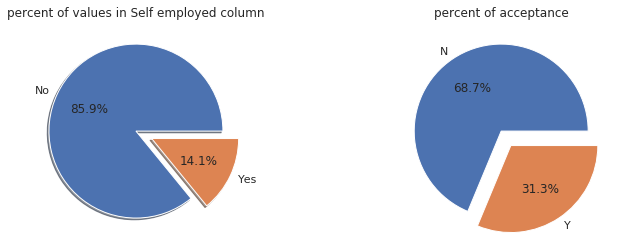

In [11]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.pie(df_train['Self_Employed'].value_counts(),explode = [0,0.2] , autopct='%.1f%%' , shadow = True , labels = ['No', 'Yes'])
plt.title('percent of values in Self employed column')
plt.subplot(1,2,2)
plt.pie(df_train['Loan_Status'].value_counts(), explode = [0,0.2], autopct = '%.1f%%' , labels = ['N', 'Y'])
plt.title('percent of acceptance')
plt.show()

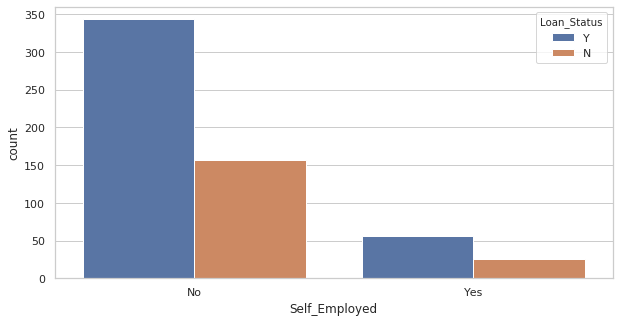

In [12]:
plt.figure(figsize = (10,5))
sns.countplot('Self_Employed' , hue = 'Loan_Status' , data = df_train)
plt.show()

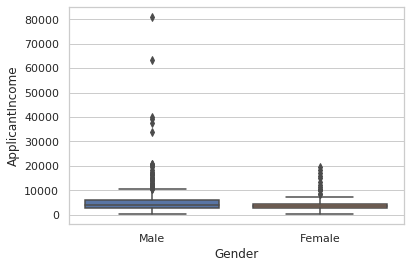

In [13]:
sns.boxplot(x = 'Gender', y='ApplicantIncome' , data = df_train)
plt.show()

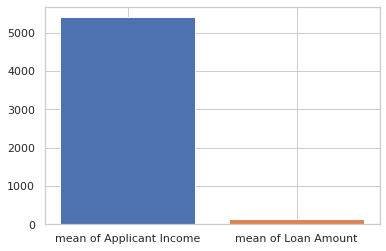

In [14]:
plt.bar('mean of Applicant Income',df_train['ApplicantIncome'].mean())
plt.bar('mean of Loan Amount', df_train['LoanAmount'].mean())
plt.show()

In [15]:
print('Unique values in Gender :',df_train['Gender'].unique())
print('Unique values in Married :',df_train['Married'].unique())
print('Unique values in Dependents :',df_train['Dependents'].unique())
print('Unique values in Education :',df_train['Education'].unique())
print('Unique values in Self Employed :',df_train['Self_Employed'].unique())
print('Unique values in Property Area :',df_train['Property_Area'].unique())
print('Unique values in Loan Status :',df_train['Loan_Status'].unique())

Unique values in Gender : ['Male' 'Female' nan]
Unique values in Married : ['No' 'Yes' nan]
Unique values in Dependents : ['0' '1' '2' '3+' nan]
Unique values in Education : ['Graduate' 'Not Graduate']
Unique values in Self Employed : ['No' 'Yes' nan]
Unique values in Property Area : ['Urban' 'Rural' 'Semiurban']
Unique values in Loan Status : ['Y' 'N']


In [16]:
df_train['Gender'] = df_train['Gender'].replace(['Male','Female'],[1,0])

In [17]:
df_train['Married'] = df_train['Married'].replace(['Yes','No'],[1,0])
df_train['Dependents'] = df_train['Dependents'].replace(['0','1','2'],[0,1,2])
df_train['Dependents'] = df_train['Dependents'].replace('3+' , 3)
df_train['Education'] = df_train['Education'].replace(['Graduate' , 'Not Graduate'],[1,0])
df_train['Self_Employed'] = df_train['Self_Employed'].replace(['Yes','No'],[1,0])
df_train['Property_Area'] = df_train['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])
df_train['Loan_Status'] = df_train['Loan_Status'].replace(['Y','N'],[1,0])

In [18]:
df_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.050489,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [19]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
df_temp = df_train.dropna()

In [22]:
df_temp.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.085417,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.839398,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [23]:
df_temp = pd.get_dummies(df_temp , columns = ['Property_Area'])

In [24]:
df_temp

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_0,Property_Area_1,Property_Area_2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,1,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,0,0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,0,0
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,1,0,0
6,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,1,1,0,0
7,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,0,0,0,1
8,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,1,1,0,0
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,0,0,0,1
10,1.0,1.0,2.0,1,0.0,3200,700.0,70.0,360.0,1.0,1,1,0,0


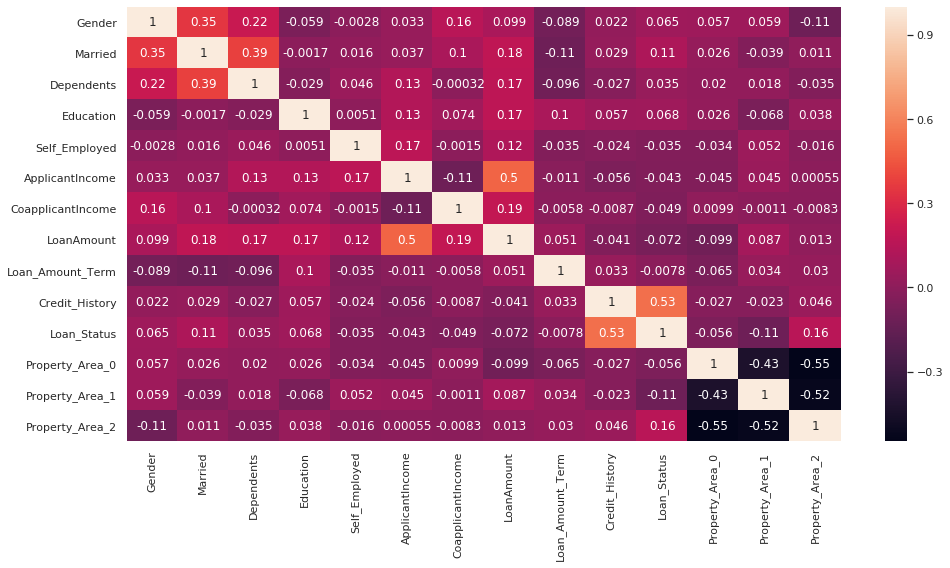

In [25]:
corr = df_temp.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr , annot = True )
plt.show()

In [26]:
df_test.dropna(inplace = True)

In [27]:
df_test['Property_Area'] = df_test['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])

In [28]:
df_test = pd.get_dummies(df_test , columns = ['Property_Area'])

In [29]:
df_test['Married'] = df_test['Married'].replace(['Yes', 'No'], [1,0])

In [30]:
df_tr_x = df_temp[['Married' , 'Credit_History' , 'Property_Area_1', 'Property_Area_2']].values
df_tr_y = df_temp['Loan_Status'].values
df_ts = df_test[['Married', 'Credit_History', 'Property_Area_1', 'Property_Area_2']].values

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_tr_x , df_tr_y , test_size = 0.25)

In [33]:
cls_lr = LogisticRegression()
cls_lr.fit(x_train, y_train)
y_pred = cls_lr.predict(x_test)
print(classification_report(y_test , y_pred))
plot_confusion_matrix(cls_lr , x_test, y_test)
plt.show()

NameError: name 'LogisticRegression' is not defined

In [34]:
cross_val = cross_val_score(cls_lr , x_train, y_train , cv=10)
print(cross_val.mean())

NameError: name 'cls_lr' is not defined

In [35]:
cls_rf = RandomForestClassifier()
cls_rf.fit(x_train, y_train)
y_pred = cls_rf.predict(x_test)
print(classification_report(y_test , y_pred))
plot_confusion_matrix(cls_rf, x_test, y_test)
plt.show()

NameError: name 'RandomForestClassifier' is not defined

In [36]:
cross_val = cross_val_score(cls_rf , x_train, y_train , cv=10)
print(cross_val.mean())

NameError: name 'cls_rf' is not defined

In [37]:
results = []
for i in range(1,25): 
    cls_knn_2 = KNeighborsClassifier(n_neighbors=i)
    cls_knn_2.fit(x_train, y_train)
    score = cls_knn_2.score(x_test ,y_test)
    results.append([score])

NameError: name 'KNeighborsClassifier' is not defined

ValueError: x and y must have same first dimension, but have shapes (24,) and (0,)

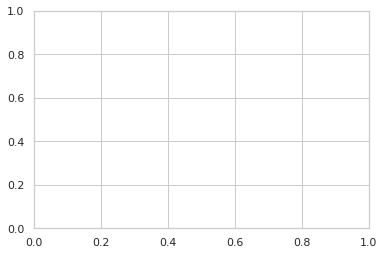

In [38]:
plt.plot(list(range(1,25)) , results)
plt.show()

In [40]:
cls_knn = KNeighborsClassifier(n_neighbors=11)
cls_knn.fit(x_train, y_train)
predicted = cls_knn.predict(df_ts)
predicted

NameError: name 'KNeighborsClassifier' is not defined